[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eirasf/GCED-AA2/blob/main/lab3/lab3_parte2.ipynb)
# Práctica 2: Redes neuronales usando Keras
## Parte 2. El modelo Sequential


# Pre-requisitos

## Instalar paquetes

Para esta segunda parte también necesitaremos TensorFlow 2.0 y TensorFlow-Datasets 

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

##Cargamos el conjunto de datos

De nuevo, seguimos empleando el conjunto *german_credit_numeric* ya empleado en el *Laboratorio 2* y en la primera parte de este Laboratorio.


In [2]:
# Cargamos el conjunto de datos
ds = tfds.load('german_credit_numeric', split='train',as_supervised=True)

tamano_lote = 1000

elems = ds.batch(tamano_lote)
lote_entrenamiento = None
for elem in elems:
    lote_entrenamiento = elem
    break

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/german_credit_numeric/1.0.0.incompleteN4YVL8/german_credit_numeric-train.tfrecord


  0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset german_credit_numeric downloaded and prepared to /root/tensorflow_datasets/german_credit_numeric/1.0.0. Subsequent calls will reuse this data.


También vamos a establecer la función de pérdida y el algoritmo que vamos a emplear para el entrenamiento. Además, establecemos la métrica que nos servirá para evaluar el rendimiento del modelo entrenado, en este caso usaremos Precision (se pueden consultar más métricas aquí https://keras.io/api/metrics/)

In [3]:
#TODO - indicar la función de perdida y el algoritmo de optimización
#fn_perdida = ...
#optimizador = ...
#Definimos la métrica Precision 
metrica = tf.keras.metrics.Precision()

# Modelo *Sequential*

Un modelo *Sequential* nos permite concatenar una serie de capas, tal y como hemos visto en la parte 1, donde cada capa tiene exactamente un tensor de entrada y un tensor de salida.
Por otro lado, el modelo *Sequential* no es adecuado cuando:
- El modelo tiene múltiples entradas o múltiples salidas
- Cualquiera de las capas tiene múltiples entradas o múltiples salidas
- Necesitas compartir capas
- Se desea una topología no lineal

En Keras un modelo *Sequential* se define como:
$$model =  tf.keras.models.Sequential()$$
El constructor puede recibir como argumentos tanto el nombre que le queremos asignar al modelo, *name*, como la lista de capas que van a conformar el modelo.

Alternativamente, el método *add* nos permite ir añadiendo distintas capas al modelo. También existe un método, *pop*, que permite realizar la operación contraria, i.e, eliminar capas del modelo. 

Para representar el mismo modelo que hemos realizado en la parte 1 de este laboratorio incluiremos 3 capas complentamente conectadas (*Dense*), indicando las unidades (*units*) que va a tener cada capa y su función de activación (*activation*). También se puede definir la *InputLayer* que se usa como punto de entrada a la red, indicando el número de entradas que tendrá el modelo.
Tras definir las capas, el modelo no está "construido", i.e., no tiene pesos. 
Para ver si la estructura de nuestro modelo es correcta, podemos construirlo (*build*) e imprimir un resumen (*summary*) que nos mostrará en modo texto la siguiente información:
- Las capas y su orden en el modelo.
- La forma de salida de cada capa.
- El número de parámetros (pesos) en cada capa.
- El número total de parámetros (pesos) en el modelo.

In [4]:
tamano_entrada = 24
h0_size = 5
h1_size = 3
#TODO - define el modelo indicando un nombre 
#model =  ...

model.add( tf.keras.layers.InputLayer((tamano_entrada,)))
#TODO - incluye las 3 capas Dense al modelo 

#Se construye el modelo y se muestra
model.build()
print(model.summary())

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 125       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________
None


Podemos trazar nuestro modelo como un gráfico

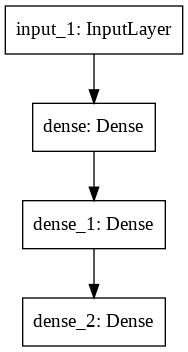

In [5]:
tf.keras.utils.plot_model(model, 'my_first_model.png')

Una vez que tenemos la arquitectura de nuestro modelo, podemos pasar a entrenarlo y evaluar su rendimiento. 
Comenzamos configurar su entrenamiento tenemos el método *compile* que admite como argumentos: 
1. la función de pérdida (*loss*)
1. el algoritmo de entrenamiento (*optimizer*) 
1. la métrica para evaluar el rendimiento (*metrics*).

In [6]:
#TODO - indicar los parametros del método compile
#model.compile(loss=...,
              optimizer=...,
              metrics=...)

Después, solo falta llamar al método *fit* que entrenará el modelo dividiendo los datos en "batches" de tamaño *batch_size* e iterando repetidamente sobre todo el conjunto de datos para un número determinado de *epochs*. También es necesario indicarle los datos de entrada y la salida deseada. Podemos almacenar el resultado del modelo en un objeto, lo cual nos permitirá tener un registro de los valores de pérdida y las métricas durante el entrenamiento.

In [7]:
num_epochs =  50
#TODO - entrenar el modelo
#history = model.fit(...)
history.history

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6647 - precision: 0.6982
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6593 - precision: 0.6994
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6544 - precision: 0.7000
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6500 - precision: 0.7000
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6460 - precision: 0.7000
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6424 - precision: 0.7000
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6392 - precision: 0.7000
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6363 - precision: 0.7000
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6337 - precision: 0.7000
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6313 - precision: 0.7000
Epoch 11/50
1/1 [=============

{'loss': [0.6646517515182495,
  0.6593040823936462,
  0.6544082760810852,
  0.6499651074409485,
  0.6459686160087585,
  0.6423870921134949,
  0.6391748785972595,
  0.6362866163253784,
  0.633682370185852,
  0.6313288807868958,
  0.6291984915733337,
  0.6272677779197693,
  0.6255162954330444,
  0.6239259839057922,
  0.6224802136421204,
  0.621164083480835,
  0.6199641227722168,
  0.6188686490058899,
  0.6178671717643738,
  0.6169506311416626,
  0.6161107420921326,
  0.6153404712677002,
  0.6146334409713745,
  0.6139840483665466,
  0.6133871078491211,
  0.6128381490707397,
  0.612332820892334,
  0.6118675470352173,
  0.6114388704299927,
  0.6110433340072632,
  0.6106781363487244,
  0.6103403568267822,
  0.6100270748138428,
  0.6097359657287598,
  0.6094644069671631,
  0.6092103123664856,
  0.6089717745780945,
  0.6087471842765808,
  0.6085353493690491,
  0.6083348989486694,
  0.6081451177597046,
  0.6079651117324829,
  0.607793927192688,
  0.6076308488845825,
  0.6074751615524292,
  0.60

Una vez el modelo está entrenado, podemos evaluarlo (método *evaluate*) con un nuevo conjunto de datos no usado durante el entrenamiento (el conjunto de *test*) para ver su rendimiento. En este caso, por simplicidad y a modo de ejemplo, evaluaremos sobre todo el conjunto. 

In [8]:
#TODO - llamar a evaluate, guardando el resultado
#result = model.evaluate(...) 

1/1 [==============================] - 0s 314ms/step - loss: 0.6067 - precision: 0.7000


Por último, mostramos el resultado obtenido

In [9]:
print(model.metrics_names)
print(result)

['loss', 'precision']
[0.6066507697105408, 0.699999988079071]
